In [137]:
psrname='J1801-1417'

In [138]:
spna_dir='/media/root1/3PAR/fazal/EPTA-ONLY/SPNA/'+psrname+'/TM_WN_DM14/ptmcmc/'
spnta_dir='/media/root1/3PAR/fazal/EPTA-ONLY/SPNTA/'+psrname+'/results/'

In [139]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd

In [140]:
epta_spna_1=np.loadtxt(spna_dir+'chain_1.txt')
par_epta_spna=pd.read_csv(spna_dir+'pars.txt', header = None)
lspn=len(par_epta_spna)
epta_spna_2=epta_spna_1.T

In [141]:
epta_spnta_1=np.loadtxt(spnta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_epta_spnta=pd.read_csv(spnta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
lspnt=len(par_epta_spnta)
epta_spnta_2=epta_spnta_1.T

In [25]:
spna_arr=[epta_spna_2[lspn-1],epta_spna_2[lspn-2]]
spnta_arr=[epta_spnta_2[lspnt-2],epta_spnta_2[lspnt-1]]
names = ['logA_R','gamma_R']
labels=['\log A_{R}','\gamma_{R}']
del_names=['delta_logA_R','delta_gamma_R']

In [142]:
spna_arr=[epta_spna_2[lspn-1],epta_spna_2[lspn-2]]
spnta_arr=[epta_spnta_2[lspnt-2],epta_spnta_2[lspnt-1]]
names = ['logA_DM','gamma_DM']
labels=['\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA_DM','delta_gamma_DM']

In [143]:
spna=MCSamples(samples=np.array(spna_arr).transpose(),loglikes=epta_spna_2[-3],names=names,labels=labels,label='SPNA')
spnta=MCSamples(samples=np.array(spnta_arr).transpose(),loglikes=epta_spnta_2[-1],names = names,labels=labels,label='SPNTA \n'+psrname)

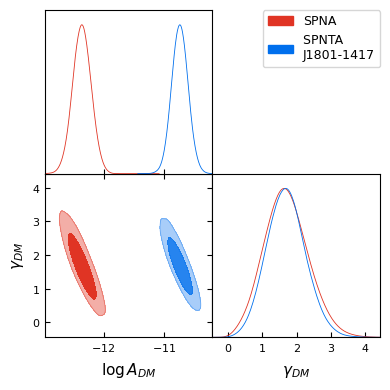

In [144]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna,spnta], filled=True)
plt.savefig(psrname+'_DM_EPTA.png',dpi=300)
plt.show()

In [145]:
from diff_chain import  Diff_chain_shift

In [146]:
diff_chain, nsig, chi_2, D_B=Diff_chain_shift(spna,spnta)

/media/root1/3PAR/fazal/EPTA-ONLY/diff_chain.py:30: UserWarning: Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.
  warnings.warn('Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.')


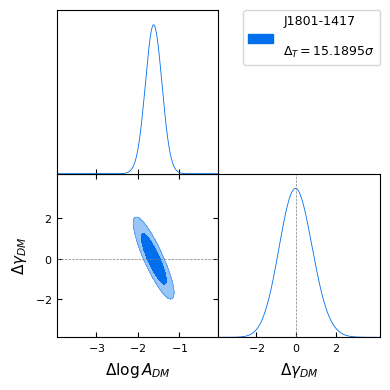

In [147]:
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_EPTA_DM.png',dpi=300)

In [121]:
def plot_diff_chain(A1,A2,lims=None,off_size=None):
    diff_chain, shift_probability, shift_lower, shift_upper=Diff_chain_shift(A1,A2,off_size)
    nsig=utilities.from_confidence_to_sigma(shift_probability)
    # plot the contour for a sanity check:
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' & '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    plt.savefig(psrname+'_'+A1.getLabel()+'_'+A2.getLabel()+'_R.png',dpi=300)
    
    return diff_chain,shift_probability

In [101]:
plot_diff_chain(spna,spnta)

/media/root1/3PAR/fazal/EPTA-ONLY/diff_chain.py:30: UserWarning: Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.
  warnings.warn('Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.')


ValueError: ('Input probability has to be between zero and one.\n', 'Input value is ', 5.052883461442657)